In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
data = Path('./Data/merged_clean_3Years_df.csv')
original_df = pd.read_csv(data)
original_df

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,...,reportedzipcode,stns,obs,pred,stn_lat,stn_lon,new_date_column,geometry,rolling_2days_obs,rolling_7days_obs
0,NO CHATHAM,2/21/2015,999,AE,41.7,-70.0,3,1,1/1/1955,2618.18,...,2650,14281,0.38,0.000000,41.6875,-69.9933,2/21/2015,POINT (-69.9933 41.6875),3.800000e-01,1.680000e+00
1,NEW BRAUNFELS,10/30/2015,2,AE,29.7,-98.1,3,1,12/2/2003,3309.59,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
2,NEW BRAUNFELS,10/30/2015,7,AE,29.7,-98.1,2,1,7/1/2003,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
3,NEW BRAUNFELS,10/30/2015,0,C,29.7,-98.1,3,1,10/17/1998,67301.33,...,78132,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
4,NEW BRAUNFELS,10/30/2015,999,C,29.7,-98.1,3,3,7/1/1995,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75656,HAMMOND,4/11/2014,999,A,44.5,-75.6,2,1,1/1/1976,0.00,...,13646,17787,0.00,0.000000,44.3768,-69.2616,4/11/2014,POINT (-69.2616 44.3768),8.220000e-13,1.120000e+00
75657,ARVERNE,1/8/2014,999,A05,40.6,-73.8,3,1,1/1/1920,0.00,...,11692,14209,0.10,0.343227,42.5420,-123.4260,1/8/2014,POINT (-123.426 42.542),4.600000e-01,4.600000e-01
75658,YORKTOWN HTS,6/8/2013,999,X,41.3,-73.8,4,1,4/1/1968,3198.97,...,10598,14262,8.64,6.556328,41.2664,-73.7975,6/8/2013,POINT (-73.7975 41.2664),1.042000e+01,1.205000e+01
75659,MC GREGOR,10/26/2013,999,X,31.5,-97.3,1,1,6/28/2000,12654.47,...,76657,1561,0.00,0.000000,30.6081,-97.0317,10/26/2013,POINT (-97.0317 30.6081),-2.410000e-14,1.110000e-13


In [35]:
#cleaning up last7_df
df = original_df.copy()

df["rolling_7days_obs"] = df["rolling_7days_obs"].round(2)


#convert date columns to datetime64[ns] 
df['dateofloss'] =  pd.to_datetime(df['dateofloss'], format='%m/%d/%Y', errors='ignore')
df["originalconstructiondate"] = df["originalconstructiondate"].apply(pd.to_datetime)
#df['originalconstructiondate'] =  pd.to_datetime(df['originalconstructiondate'], format='%m/%d/%Y', errors='ignore')

#merged_df.dtypes
#split the dates into sperate columns for dd, mm and yyyy
#split date of loss
df[['lossyear','lossmonth','lossday']] = df.dateofloss.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#split original construction date
df[['builtyear','builtmonth','builtday']] = df.originalconstructiondate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


#convert split columns to floats
df['lossyear'] = df['lossyear'].astype(float)
df['lossmonth'] = df['lossmonth'].astype(float)
df['builtyear'] = df['builtyear'].astype(float)

#age of the property at the time of loss
df['propertyage'] = df['lossyear'] - df['builtyear'] 

In [36]:
df_2015 = df.copy()

indexNames = df_2015[df_2015['lossyear'] < 2015 ].index
 
# Delete these row indexes from dataFrame
df_2015.drop(indexNames , inplace=True)

In [37]:
df = df_2015.copy()

In [38]:
#keeping chosen features and dropping all other columns from merged data

#df = merged_df.copy()
#df = df.drop("reportedzipcode", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("elevationdifference", axis=1)
df = df.drop("latitude", axis=1)
df = df.drop("longitude", axis=1)
df = df.drop("numberoffloorsintheinsuredbuilding", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("lossyear", axis=1)
df = df.drop("lossday", axis=1)
df = df.drop("builtyear", axis=1)
df = df.drop("builtmonth", axis=1)
df = df.drop("builtday", axis=1)
df = df.drop("stn_lat", axis=1)
df = df.drop("stn_lon", axis=1)
df = df.drop("geometry", axis=1)
df = df.drop("new_date_column", axis=1)
df = df.drop("rolling_2days_obs", axis=1)
#df = df.drop("state", axis=1)
#df = df.drop("lossmonth", axis=1)
#df = df.drop("occupancytype", axis=1)

#dropping columns that might be providing redundant information
df = df.drop("obs", axis=1)
df = df.drop("pred", axis=1)
df = df.drop("stns", axis=1)


#df.head(3)
df_encoded = pd.get_dummies(df, columns=["floodzone", "lossmonth", "occupancytype", "state"])
#df_encoded = pd.get_dummies(df, columns=["floodzone", "occupancytype", "lossmonth", "state"])

In [39]:
df.head(3)

,floodzone,occupancytype,amountpaidonbuildingclaim,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage
0,AE,1,2618.18,MA,2650,1.68,2.0,60.0
1,AE,1,3309.59,TX,78130,22.08,10.0,12.0
2,AE,1,0.00,TX,78130,22.08,10.0,12.0


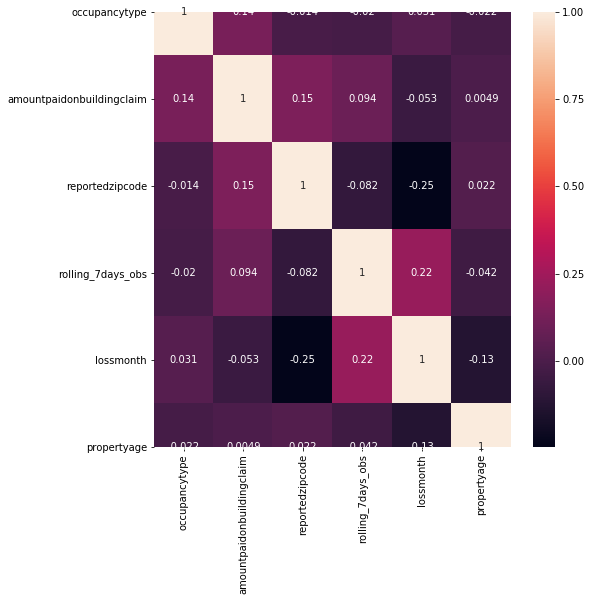

In [40]:
import matplotlib.pyplot as plt
#generating a correlation matrix
corrMatrix = df.corr()
import seaborn as sn
fig, ax = plt.subplots(figsize=(8,8)) 

sn.heatmap(corrMatrix, annot=True, ax = ax)

In [41]:
#combining common floodzones
filter_zones_A = [col for col in df_encoded if col.startswith('floodzone_A')]
filter_zones_V = [col for col in df_encoded if col.startswith('floodzone_V')]

df_encoded["Zone A"] = df_encoded[filter_zones_A].sum(axis = 1, skipna = True)
df_encoded["Zone V"] = df_encoded[filter_zones_V].sum(axis = 1, skipna = True) 

df_encoded.rename(columns={"Zone A": "floodzone_A", "Zone V": "floodzone_V"})

,amountpaidonbuildingclaim,reportedzipcode,rolling_7days_obs,propertyage,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,floodzone_A,floodzone_V
0,2618.18,2650,1.68,60.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3309.59,78130,22.08,12.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.00,78130,22.08,12.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,67301.33,78132,22.08,17.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.00,78130,22.08,20.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75651,0.00,29412,11.95,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75652,78995.22,29510,49.13,10.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75653,0.00,29169,3.28,25.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75654,5779.26,31906,14.15,42.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
df_encoded = df_encoded.drop(df_encoded[filter_zones_A], axis=1)
df_encoded = df_encoded.drop(df_encoded[filter_zones_V], axis=1)
#df_encoded.columns.tolist()

In [43]:
#df_encoded_withrain = df_encoded.copy()

indexNames = df_encoded[df_encoded['rolling_7days_obs'] < 0.5].index
 
# Delete these row indexes from dataFrame
df_encoded.drop(indexNames , inplace=True)

df_encoded.rolling_7days_obs.min()

0.5

In [44]:
y =df_encoded.copy()
X =df_encoded.copy()
X = X.drop("amountpaidonbuildingclaim", axis=1)

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['amountpaidonbuildingclaim'],
                                                   random_state=1)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [46]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [47]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 45155.93954053785
R2 score of training set is 0.174329786411637


The model performance for the test set
-------------------------------------------
RMSE of test set is 57178.345903313755
R2 score of test set is -0.10712388607518797
